In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import spacy
from sklearn import preprocessing
nlp = spacy.load("en_core_web_sm")

In /home/fatma/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/fatma/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/fatma/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/fatma/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/fatma/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylel

In [2]:
twitter_rac_test_df = pd.read_csv("../../../Data/Kaggle/kaggle_data_test.csv")

In [3]:
twitter_rac_test_df.columns

Index(['index', 'oh_label', 'Date', 'Text', 'Text_clean_for_BERT',
       'Text_clean', 'LSTM_prediction', 'BiLSTM_prediction',
       'BERT_prediction_no_stem', 'NFT_BERT_prediction', 'LR_prediction',
       'MLP_prediction', 'MLP_prediction_glove_twitter',
       'MLP_prediction_glove_cc', 'MLP_prediction_sswe_u', 'MLP_prediction_ud',
       'MLP_prediction_glove_wk', 'MLP_prediction_w2v_news',
       'LSTM_prediction_glove_twitter', 'LSTM_prediction_glove_cc',
       'LSTM_prediction_sswe_u', 'LSTM_prediction_ud',
       'LSTM_prediction_glove_wk', 'LSTM_prediction_w2v_news',
       'BiLSTM_prediction_glove_twitter', 'BiLSTM_prediction_glove_cc',
       'BiLSTM_prediction_sswe_u', 'BiLSTM_prediction_ud',
       'BiLSTM_prediction_glove_wk', 'BiLSTM_prediction_w2v_news',
       'BERT_FT_wtp_agg_generlization', 'BERT_NFT_Kaggle',
       'BERT_FT_diverse_ds_generlization'],
      dtype='object')

In [4]:
data_test_correct_Bert_prediction = twitter_rac_test_df[twitter_rac_test_df.BERT_prediction_no_stem == twitter_rac_test_df.oh_label]

data_test_wrong_Bert_prediction = twitter_rac_test_df[twitter_rac_test_df.BERT_prediction_no_stem != twitter_rac_test_df.oh_label]

In [5]:
len(data_test_correct_Bert_prediction), len(data_test_wrong_Bert_prediction)

(1886, 340)

In [6]:
TP = data_test_correct_Bert_prediction[data_test_correct_Bert_prediction["BERT_prediction_no_stem"] == 1]
TN = data_test_correct_Bert_prediction[data_test_correct_Bert_prediction["BERT_prediction_no_stem"] == 0]

In [7]:
FP = data_test_wrong_Bert_prediction[data_test_wrong_Bert_prediction["BERT_prediction_no_stem"] == 1]
FN = data_test_wrong_Bert_prediction[data_test_wrong_Bert_prediction["BERT_prediction_no_stem"] == 0]

In [8]:
len(TP),len(TN),len(FP), len(FN)

(567, 1319, 126, 214)

## get the linguistic features in the dataset

In [9]:
def return_pos_features(doc):
  text = []
  lemma = []
  pos = []
  tag = []
  dep = []
  shape = []
  is_alpha = []
  is_stop = []
  for token in doc:
      text.append(token.text)
      lemma.append(token.lemma_)
      pos.append(token.pos_)
      tag.append(token.tag_)
      dep.append(token.dep_)
      shape.append(token.shape_)
      is_alpha.append(token.is_alpha)
      is_stop.append(token.is_stop)
  featurs_df = pd.DataFrame.from_dict({"text":text,"lemma":lemma,"pos":pos,"tag":tag,"dep":dep,"shape":shape,"is_alpha":is_alpha,"is_stop":is_stop})
  return featurs_df

def return_NERT_featurs(docs):
  text = []
  ner_label = []
  for ent in docs.ents:
      text.append(ent.text)
      ner_label.append(ent.label_)
  featurs_df = pd.DataFrame.from_dict({"text":text,"ner_label":ner_label})
  return featurs_df

In [10]:
nlp.max_length = 18567091

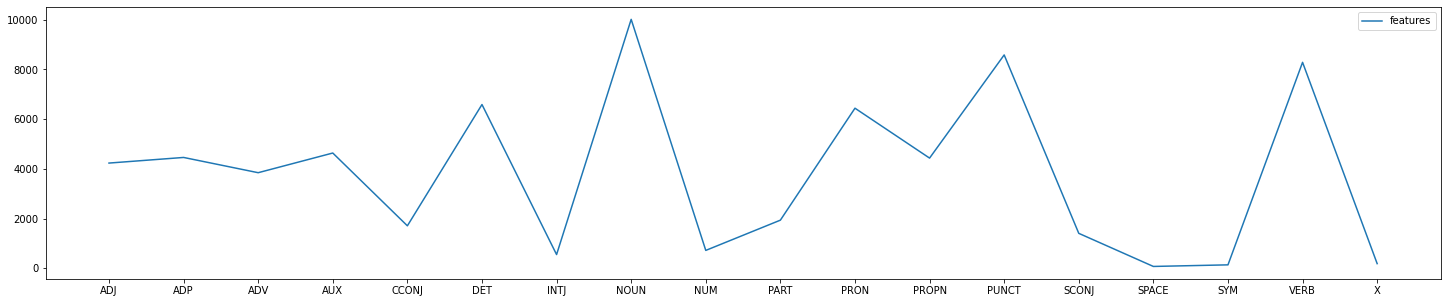

In [42]:
#data_correct_prediction_docs = "/n".join(data_test_correct_Bert_prediction["Text_clean_for_BERT"])
#data_wrong_prediction_docs = "/n".join(data_test_wrong_Bert_prediction["Text_clean_for_BERT"])
data_docs = " ".join(twitter_rac_test_df["Text_clean_for_BERT"])
#data_correct_prediction_features = nlp(data_correct_prediction_docs, disable = ['ner', 'parser'])
#data_wrong_prediction_features = nlp(data_wrong_prediction_docs, disable = ['ner', 'parser'])
data_docs_features = nlp(data_docs, disable = ['ner', 'parser'])
#data_correct_prediction_features_df = return_pos_features(data_correct_prediction_features) 
#data_wrong_prediction_features_df = return_pos_features(data_wrong_prediction_features) 
data_docs_features_df = return_pos_features(data_docs_features) 

import matplotlib.pyplot as plt
plt.subplots(figsize=(25, 5))
#plt.plot(data_correct_prediction_features_df.groupby(data_correct_prediction_features_df["pos"]).pos.count(), label="correct_prediction_features")
#plt.plot(data_wrong_prediction_features_df.groupby(data_wrong_prediction_features_df["pos"]).pos.count(),label="wrong_prediction_features")
plt.plot(data_docs_features_df.groupby(data_docs_features_df["pos"]).pos.count(),label="features")

plt.legend()

## get the attribution scores of all the unique words from BERT FT on Twitter racism DS
## test dataset

In [43]:
attribution_scores = pd.read_csv("attribution_Scores/bert_with_fine_tuning/Kaggle_1000_data_fine_tuned_bert_attribution_scores.csv")

In [44]:
len(attribution_scores)

28347

In [45]:
attribution_scores.head()

,words,attribution,abs_attribution
0,you,-8.852147e-07,8.852147e-07
1,make,-1.564352e-06,1.564352e-06
2,a,-9.755621e-07,9.755621e-07
3,good,-1.022908e-06,1.022908e-06
4,point,-1.454421e-07,1.454421e-07


In [46]:
attribution_scores["abs_attribution"] = [np.absolute(i) for i in attribution_scores.attribution]
word_attribution_grp = attribution_scores.groupby(attribution_scores["words"])

In [47]:
import numpy as np

unique_words = []
avg_attribution = []
avg_abs_attribution = []
no_occurances = []
for name,grp in word_attribution_grp:
    unique_words.append(name)
    avg_attribution.append(np.mean(grp["attribution"]))
    avg_abs_attribution.append(np.mean(grp["abs_attribution"]))
    no_occurances.append(len(grp["attribution"]))

In [48]:
word_attribution_unique = {}
word_attribution_unique["unique_words"] = unique_words
word_attribution_unique["attribution"] = avg_attribution
word_attribution_unique["abs_attribution"] = avg_abs_attribution
word_attribution_unique["No_occurences"] = no_occurances

In [49]:
word_attribution_unique_df = pd.DataFrame.from_dict(word_attribution_unique)
len(word_attribution_unique_df)

4452

<AxesSubplot:>

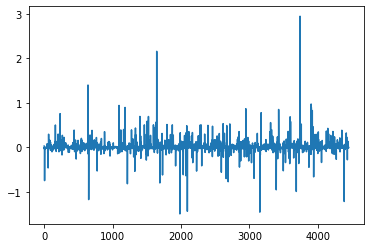

In [50]:
word_attribution_unique_df["attribution"].plot()

<AxesSubplot:>

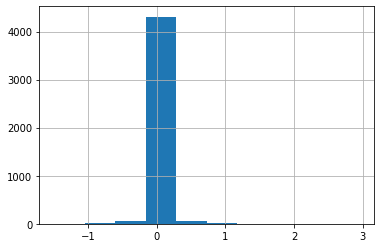

In [51]:
word_attribution_unique_df["attribution"].hist()

In [52]:
word_attribution_unique_df[word_attribution_unique_df["attribution"] > 0].min(),word_attribution_unique_df[word_attribution_unique_df["attribution"] > 0].max(),word_attribution_unique_df[word_attribution_unique_df["attribution"] > 0].mean(),word_attribution_unique_df[word_attribution_unique_df["attribution"] > 0].std()

(unique_words                 !
 attribution        1.15165e-09
 abs_attribution    1.15165e-09
 No_occurences                1
 dtype: object,
 unique_words       zombies
 attribution        2.94414
 abs_attribution    2.94414
 No_occurences         1970
 dtype: object,
 attribution        0.039624
 abs_attribution    0.041760
 No_occurences      8.572292
 dtype: float64,
 attribution         0.128328
 abs_attribution     0.128994
 No_occurences      58.663100
 dtype: float64)

In [53]:
word_attribution_unique_df[word_attribution_unique_df["attribution"] < 0].min(),word_attribution_unique_df[word_attribution_unique_df["attribution"] < 0].max(),word_attribution_unique_df[word_attribution_unique_df["attribution"] < 0].mean(),word_attribution_unique_df[word_attribution_unique_df["attribution"] < 0].std()

(unique_words               ##0
 attribution           -1.49017
 abs_attribution    1.63695e-10
 No_occurences                1
 dtype: object,
 unique_words                 ~
 attribution       -1.63695e-10
 abs_attribution        1.49017
 No_occurences              490
 dtype: object,
 attribution       -0.022037
 abs_attribution    0.023243
 No_occurences      4.304216
 dtype: float64,
 attribution         0.095699
 abs_attribution     0.096144
 No_occurences      25.013014
 dtype: float64)

In [54]:
word_attribution_unique_df[word_attribution_unique_df["attribution"] > 0.7].sort_values(by=["attribution"])

,unique_words,attribution,abs_attribution,No_occurences
233,##ffey,0.759474,0.759474,1
3173,pig,0.780954,0.780954,2
3921,suck,0.829769,0.829769,17
3429,refrigerator,0.852813,0.852813,1
2949,negro,0.870045,0.870045,1
1183,bastards,0.898520,0.898520,2
3907,stupidity,0.899475,0.899475,1
1095,arrogant,0.943050,0.943050,1
3904,stuffed,0.974976,0.974976,1
641,##rites,1.401332,1.401332,1


In [55]:
word_attribution_unique_df[word_attribution_unique_df["attribution"] < -0.8].sort_values(by=["attribution"])

,unique_words,attribution,abs_attribution,No_occurences
1985,failure,-1.490167,1.490167,1
3154,phillies,-1.450010,1.450010,1
2094,forest,-1.430930,1.430930,1
4388,wondering,-1.211433,1.211433,1
651,##ror,-1.169103,1.169103,1
3687,shots,-0.986170,0.986170,2
3394,rays,-0.949452,0.949452,1
1217,below,-0.813318,0.813318,1


In [56]:
word_attribution_unique_df.sort_values(by=["attribution"],ascending=True)

,unique_words,attribution,abs_attribution,No_occurences
1985,failure,-1.490167,1.490167,1
3154,phillies,-1.450010,1.450010,1
2094,forest,-1.430930,1.430930,1
4388,wondering,-1.211433,1.211433,1
651,##ror,-1.169103,1.169103,1
...,...,...,...,...
1095,arrogant,0.943050,0.943050,1
3904,stuffed,0.974976,0.974976,1
641,##rites,1.401332,1.401332,1
1646,cruel,2.157363,2.157363,2


In [57]:
word_attribution_unique_df.head(10)

,unique_words,attribution,abs_attribution,No_occurences
0,!,3.229188e-02,4.211024e-02,459
1,##0,-4.133213e-03,7.077514e-03,315
2,##00,-9.122604e-03,9.125054e-03,3
3,##01,7.438323e-07,8.242313e-07,12
4,##0s,-3.487520e-02,3.495747e-02,10
5,##1,1.027389e-07,3.312112e-07,8
6,##100,-7.432379e-01,7.432379e-01,1
7,##15,-9.032236e-08,9.032236e-08,1
8,##16,-1.213342e-07,1.213342e-07,1
9,##19,-1.944648e-06,1.944648e-06,1


In [58]:
word_attribution_unique_df.tail(10)

,unique_words,attribution,abs_attribution,No_occurences
4442,yourself,6.916215e-02,7.270392e-02,36
4443,yourselves,1.067068e-08,1.067068e-08,1
4444,yu,5.222209e-08,5.222209e-08,1
4445,yuri,-4.836931e-05,4.836931e-05,1
4446,z,1.346630e-01,1.346630e-01,1
4447,za,-7.973900e-08,7.973900e-08,1
4448,zero,-1.182709e-02,1.182709e-02,4
4449,zombies,1.746301e-05,1.746301e-05,2
4450,zulu,-1.510203e-02,1.510203e-02,1
4451,~,-2.819968e-07,2.819968e-07,1


In [59]:
word_attribution_unique_df.corr()

,attribution,abs_attribution,No_occurences
attribution,1.000000,0.264960,0.004491
abs_attribution,0.264960,1.000000,-0.004137
No_occurences,0.004491,-0.004137,1.000000


## attribution scores of the linguistic features in normal text

In [60]:
def normalize(x):
    amin, amax = min(x), max(x)
    for i, val in enumerate(x):
         x[i] = (val-amin) / (amax-amin)
    return x        

In [61]:
normalize(np.array([0.1,0.5,0.3]))

array([0. , 1. , 0.5])

In [62]:
def importance_score_of_ADJ_in_features (features):
    Twitter_rac_adj = features[features["pos"]=="ADJ"]
    adj_text = Twitter_rac_adj["text"].values
    attribution_adj = [word_attribution_unique_df[word_attribution_unique_df["unique_words"] == i]["abs_attribution"].values[0] if i in word_attribution_unique_df["unique_words"].values else 0 for i in adj_text]
    attribution_adj = normalize(attribution_adj)
    adj_attribution = {}
    adj_attribution["adj"] = adj_text
    adj_attribution["adj_attribution"] = attribution_adj
    adj_attribution_df = pd.DataFrame.from_dict(adj_attribution)
    return adj_attribution_df

In [63]:
def importance_score_of_PRON_in_features (features):
    Twitter_rac_pron = features[features["pos"]=="PRON"]
    pron_text = Twitter_rac_pron["text"].values
    attribution_pron = [word_attribution_unique_df[word_attribution_unique_df["unique_words"] == i]["abs_attribution"].values[0] if i in word_attribution_unique_df["unique_words"].values else 0 for i in pron_text]
    attribution_pron = normalize(attribution_pron)
    pron_attribution = {}
    pron_attribution["pron"] = pron_text
    pron_attribution["pron_attribution"] = attribution_pron
    pron_attribution_df = pd.DataFrame.from_dict(pron_attribution)
    return pron_attribution_df

In [64]:
def importance_score_of_DET_in_features (features):
    Twitter_rac_det = features[features["pos"]=="DET"]
    det_text = Twitter_rac_det["text"].values
    attribution_det = [word_attribution_unique_df[word_attribution_unique_df["unique_words"] == i]["abs_attribution"].values[0] if i in word_attribution_unique_df["unique_words"].values else 0 for i in det_text]
    attribution_det = normalize(attribution_det)
    det_attribution = {}
    det_attribution["det"] = det_text
    det_attribution["det_attribution"] = attribution_det
    det_attribution_df = pd.DataFrame.from_dict(det_attribution)
    return det_attribution_df

In [65]:
def importance_score_of_ADV_in_features (features):
    Twitter_rac_adv = features[features["pos"]=="ADV"]
    adv_text = Twitter_rac_adv["text"].values
    attribution_adv = [word_attribution_unique_df[word_attribution_unique_df["unique_words"] == i]["abs_attribution"].values[0] if i in word_attribution_unique_df["unique_words"].values else 0 for i in adv_text]
    attribution_adv = normalize(attribution_adv)
    adv_attribution = {}
    adv_attribution["adv"] = adv_text
    adv_attribution["adv_attribution"] = attribution_adv
    adv_attribution_df = pd.DataFrame.from_dict(adv_attribution)
    return adv_attribution_df

In [66]:
def importance_score_of_NOUN_in_features (features):
    Twitter_rac_noun = features[features["pos"]=="NOUN"]
    noun_text = Twitter_rac_noun["text"].values
    attribution_noun = [word_attribution_unique_df[word_attribution_unique_df["unique_words"] == i]["abs_attribution"].values[0] if i in word_attribution_unique_df["unique_words"].values else 0 for i in noun_text]
    attribution_noun = normalize(attribution_noun)
    noun_attribution = {}
    noun_attribution["noun"] = noun_text
    noun_attribution["noun_attribution"] = attribution_noun
    noun_attribution_df = pd.DataFrame.from_dict(noun_attribution)
    return noun_attribution_df

In [67]:
def importance_score_of_VERB_in_features (features):
    Twitter_rac_verb = features[features["pos"]=="VERB"]
    verb_text = Twitter_rac_verb["text"].values
    attribution_verb = [word_attribution_unique_df[word_attribution_unique_df["unique_words"] == i]["abs_attribution"].values[0] if i in word_attribution_unique_df["unique_words"].values else 0 for i in verb_text]
    attribution_verb = normalize(attribution_verb)
    verb_attribution = {}
    verb_attribution["verb"] = verb_text
    verb_attribution["verb_attribution"] = attribution_verb
    verb_attribution_df = pd.DataFrame.from_dict(verb_attribution)
    return verb_attribution_df

In [68]:
def importance_score_of_PUNCT_in_features (features):
    Twitter_rac_punc = features[features["pos"]=="PUNCT"]
    punc_text = Twitter_rac_punc["text"].values
    attribution_punc = [word_attribution_unique_df[word_attribution_unique_df["unique_words"] == i]["abs_attribution"].values[0] if i in word_attribution_unique_df["unique_words"].values else 0 for i in punc_text]
    attribution_punc = normalize(attribution_punc)
    punc_attribution = {}
    punc_attribution["punc"] = punc_text
    punc_attribution["punc_attribution"] = attribution_punc
    punc_attribution_df = pd.DataFrame.from_dict(punc_attribution)
    return punc_attribution_df

In [69]:
def importance_score_of_PROPN_in_features (features):
    Twitter_rac_punc = features[features["pos"]=="PROPN"]
    punc_text = Twitter_rac_punc["text"].values
    attribution_punc = [word_attribution_unique_df[word_attribution_unique_df["unique_words"] == i]["abs_attribution"].values[0] if i in word_attribution_unique_df["unique_words"].values else 0 for i in punc_text]
    attribution_punc = normalize(attribution_punc)
    punc_attribution = {}
    punc_attribution["propn"] = punc_text
    punc_attribution["propn_attribution"] = attribution_punc
    punc_attribution_df = pd.DataFrame.from_dict(punc_attribution)
    return punc_attribution_df

In [70]:
def importance_score_of_AUX_in_features (features):
    Twitter_rac_punc = features[features["pos"]=="AUX"]
    punc_text = Twitter_rac_punc["text"].values
    attribution_punc = [word_attribution_unique_df[word_attribution_unique_df["unique_words"] == i]["abs_attribution"].values[0] if i in word_attribution_unique_df["unique_words"].values else 0 for i in punc_text]
    attribution_punc = normalize(attribution_punc)
    punc_attribution = {}
    punc_attribution["aux"] = punc_text
    punc_attribution["aux_attribution"] = attribution_punc
    punc_attribution_df = pd.DataFrame.from_dict(punc_attribution)
    return punc_attribution_df

In [71]:
def importance_score_of_ADP_in_features (features):
    Twitter_rac_punc = features[features["pos"]=="ADP"]
    punc_text = Twitter_rac_punc["text"].values
    attribution_punc = [word_attribution_unique_df[word_attribution_unique_df["unique_words"] == i]["abs_attribution"].values[0] if i in word_attribution_unique_df["unique_words"].values else 0 for i in punc_text]
    attribution_punc = normalize(attribution_punc)
    punc_attribution = {}
    punc_attribution["adp"] = punc_text
    punc_attribution["adp_attribution"] = attribution_punc
    punc_attribution_df = pd.DataFrame.from_dict(punc_attribution)
    return punc_attribution_df

## attribution scores of POS in all docs

In [72]:
adj_attribution_df_correct_txt = importance_score_of_ADJ_in_features(data_docs_features_df)
pron_attribution_df_correct_txt = importance_score_of_PRON_in_features(data_docs_features_df)
noun_attribution_df_correct_txt = importance_score_of_NOUN_in_features(data_docs_features_df)
det_attribution_df_correct_txt = importance_score_of_DET_in_features(data_docs_features_df)
verb_attribution_df_correct_txt = importance_score_of_VERB_in_features(data_docs_features_df)
punc_attribution_df_correct_txt = importance_score_of_PUNCT_in_features(data_docs_features_df)
adv_attribution_df_correct_txt = importance_score_of_ADV_in_features(data_docs_features_df)
aaux_attribution_df_correct_txt = importance_score_of_AUX_in_features(data_docs_features_df)
propn_attribution_df_correct_txt = importance_score_of_PROPN_in_features(data_docs_features_df)
adp_attribution_df_correct_txt = importance_score_of_ADP_in_features(data_docs_features_df)

In [87]:
adj_attribution_df_correct_txt.to_csv("attribution_Scores/bert_with_fine_tuning/kaggle_adj_tags_importance_scores_df.csv",index=False)
pron_attribution_df_correct_txt.to_csv("attribution_Scores/bert_with_fine_tuning/kaggle_pron_tags_importance_scores_df.csv",index=False)
noun_attribution_df_correct_txt.to_csv("attribution_Scores/bert_with_fine_tuning/kaggle_noun_tags_importance_scores_df.csv",index=False)
det_attribution_df_correct_txt.to_csv("attribution_Scores/bert_with_fine_tuning/kaggle_det_tags_importance_scores_df.csv",index=False)
verb_attribution_df_correct_txt.to_csv("attribution_Scores/bert_with_fine_tuning/kaggle_verb_tags_importance_scores_df.csv",index=False)
punc_attribution_df_correct_txt.to_csv("attribution_Scores/bert_with_fine_tuning/kaggle_punc_tags_importance_scores_df.csv",index=False)
adv_attribution_df_correct_txt.to_csv("attribution_Scores/bert_with_fine_tuning/kaggle_adv_tags_importance_scores_df.csv",index=False)
aaux_attribution_df_correct_txt.to_csv("attribution_Scores/bert_with_fine_tuning/kaggle_aux_tags_importance_scores_df.csv",index=False)
propn_attribution_df_correct_txt.to_csv("attribution_Scores/bert_with_fine_tuning/kaggle_propn_tags_importance_scores_df.csv",index=False)
adp_attribution_df_correct_txt.to_csv("attribution_Scores/bert_with_fine_tuning/kaggle_adp_tags_importance_scores_df.csv",index=False)

In [85]:
len(adj_attribution_df_correct_txt), len(pron_attribution_df_correct_txt)

(4230, 6436)

In [77]:
print("ADJ",np.mean(adj_attribution_df_correct_txt["adj_attribution"]))
print("PRON", np.mean(pron_attribution_df_correct_txt["pron_attribution"]))
print("NOUN",np.mean(noun_attribution_df_correct_txt["noun_attribution"]))
print("DET",np.mean(det_attribution_df_correct_txt["det_attribution"]))
print("VERB",np.mean(verb_attribution_df_correct_txt["verb_attribution"]))
print("PUNC",np.mean(punc_attribution_df_correct_txt["punc_attribution"]))
print("ADV",np.mean(adv_attribution_df_correct_txt["adv_attribution"]))
print("PROPN",np.mean(propn_attribution_df_correct_txt["propn_attribution"]))
print("AUX",np.mean(aaux_attribution_df_correct_txt["aux_attribution"]))
print("ADP",np.mean(adp_attribution_df_correct_txt["adp_attribution"]))

ADJ 0.023348791921752075
PRON 0.17222005910546623
NOUN 0.012460286558038118
DET 0.16167731411178918
VERB 0.018559426350024368
PUNC 0.36682723809792206
ADV 0.02315763361708994
PROPN 0.016008698753405527
AUX 0.48440960095778257
ADP 0.016069186813667813


In [91]:
det_attribution_df_correct_txt.det.unique(),len(det_attribution_df_correct_txt.det.unique() )

(array(['your', 'the', 'a', 'all', 'this', 'my', 'no', 'that', 'their',
        'our', 'an', 'these', 'her', 'some', 'another', 'what', 'any',
        'such', 'which', 'his', 'its', '\\xa0sheeps', 'quite', 'those',
        'fuck', 'whatever', 'every', 'at\\xa0the', 'both', 'v\\xe4rsta',
        'each', 'whose', 'mel', '\\xa0the', 'either', 'p', 'yours', 'half',
        'yours.\\n', 'real', 'withe', '\\xa0this', 'r', 'anti-white.the',
        'news\\n', '\\n\\n\\nthe', 'neither', 'mo\\xa0both', 'u'],
       dtype=object),
 49)

In [100]:
pron_attribution_df_correct_txt.pron.unique(), len(pron_attribution_df_correct_txt.pron.unique())

(array(['you', 'they', 'we', 'it', 'i', 'he', 'me', 'them', 'him', 'what',
        'on.\\xa0', 'who', 'themselves', 'u', 'us', 'yourself', 'nothing',
        'someone', 'there', 'she', 'everyone', 'anything', 'her',
        'herself', 'nobody', 'everything', 'to\\xa0live', 'anyone',
        'stop\\xa0embarrassing\\xa0yourself', 'night.\\xa0\\n',
        'something', 'somebody', 'myself', 'himself', 'yours', 'whoever',
        'mine', 'ya', 'everybody', 'anybody', 'itself', 'em', 'whom',
        'ourselves', 'ability.a', 'whatcha', 'one', 'understand\\n',
        'whenthey', 'we\\u2019ve', '.what', '\\u2665', 'design4u1\\n',
        '\\r\\n', 'theirs', 'one\\u2019s', 'fuckyourself', 'bs', 'his',
        'tolerance\\xa0you', 'az', 'you.\\n\\xa0\\n', 'job\\n\\nso',
        'the\\xa0adults', 'he\\xa0personally'], dtype=object),
 65)

In [92]:
punc_attribution_df_correct_txt.punc.unique(), len(punc_attribution_df_correct_txt.punc.unique())

(array(['.', '...', '*', ',', 'be.\\xa0', '.but', '.as', '..', '!', '-',
        '?', '(', ')', '.\\n\\n', '--', 'am.\\xa0', '.stupid', ':',
        'sh1thead', '.o', 'r', '.\\nshut', '[', ']', '\\xa0', ';', '.go',
        '.\\xa0\\n\\n', 'is.\\xa0', 'faggot.\\n\\nshow', 'less\\n',
        'powers\\n', 'pena\\n', '.boywonder', '.the', 'to\\xa0while',
        '\\xa0that\\u2019s', '\\xa0that', 'edit\\n', '^_^', '.and',
        'n\\xe5gonstans', 's\\xe5', 'fr\\xe5n', 'd\\xe4remot', '.\\n',
        '.if', '.oh', '\\n\\nyou', '\\xa0again', '\\xa0fuck', '.i',
        '\\xa0mc', 'years.\\n\\xa0\\n', '.when', '.it', '.quit', '.\\xb7',
        'down.in', '.you', '.\\xa0', '.an', '=', '.or', '\\xa0weak',
        '\\xa0every', 'year\\nmy', '\\xa0shit', 'a\\xa0first\\xa0term',
        'are\\xa0consequences\\xa0for', 'go.\\xa0', 'it.\\xa0', 'a\\xa0',
        '\\xa0if', '-fcbba858f167b1594a66777bca', '-_-', 'do.\\xa0',
        'therefore\\xa0', '.why', 'shi*t', '===============one', 'like\\n',
     

In [98]:
import string

string.punctuation
len([i for i in punc_attribution_df_correct_txt.punc.unique() if i not in string.punctuation])

157

In [93]:
aaux_attribution_df_correct_txt.aux.unique(),len(aaux_attribution_df_correct_txt.aux.unique())

(array(['are', 'have', 'been', 'is', 'did', 'was', 'am', 'do', 'be', 'get',
        'does', 'had', 'has', 'being', 'were'], dtype=object),
 15)

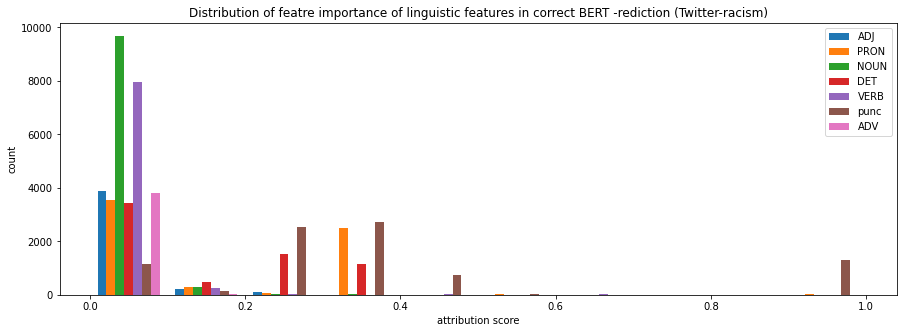

In [78]:
plt.subplots(figsize=(15, 5))
plt.hist([adj_attribution_df_correct_txt["adj_attribution"],
          pron_attribution_df_correct_txt["pron_attribution"],
          noun_attribution_df_correct_txt["noun_attribution"],
          det_attribution_df_correct_txt["det_attribution"],
         verb_attribution_df_correct_txt["verb_attribution"],
        punc_attribution_df_correct_txt["punc_attribution"],
         adv_attribution_df_correct_txt["adv_attribution"]],
         label=["ADJ","PRON","NOUN","DET","VERB","punc","ADV"], stacked=False)
plt.xlabel("attribution score")
plt.ylabel("count")
plt.title("Distribution of featre importance of linguistic features in correct BERT -rediction (Twitter-racism)")
plt.legend()

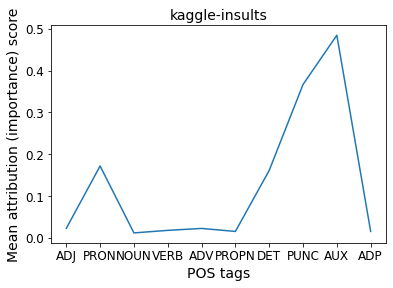

In [82]:
plt.plot(["ADJ","PRON","NOUN","VERB","ADV", "PROPN","DET","PUNC", "AUX", "ADP"],
        [adj_attribution_df_correct_txt["adj_attribution"].mean(),
          pron_attribution_df_correct_txt["pron_attribution"].mean(),
          noun_attribution_df_correct_txt["noun_attribution"].mean(),
         verb_attribution_df_correct_txt["verb_attribution"].mean(),
         adv_attribution_df_correct_txt["adv_attribution"].mean(),         
         propn_attribution_df_correct_txt["propn_attribution"].mean(),
         det_attribution_df_correct_txt["det_attribution"].mean(),
         punc_attribution_df_correct_txt["punc_attribution"].mean(),
         aaux_attribution_df_correct_txt["aux_attribution"].mean(),
         adp_attribution_df_correct_txt["adp_attribution"].mean()])
plt.title("kaggle-insults", fontsize=14)
plt.ylabel("Mean attribution (importance) score", fontsize=14)
plt.xlabel("POS tags",fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("Kaggle-insults-pos-tags.eps",format='eps',bbox_inches='tight')

In [99]:
pos_tags_importance_scores_df = pd.DataFrame.from_dict({"POS_tag":["ADJ","PRON","NOUN","VERB","ADV", "PROPN","DET","PUNC", "AUX", "ADP"],
                                                        "mean_importance_score":[adj_attribution_df_correct_txt["adj_attribution"].mean(),
                                                          pron_attribution_df_correct_txt["pron_attribution"].mean(),
                                                          noun_attribution_df_correct_txt["noun_attribution"].mean(),
                                                         verb_attribution_df_correct_txt["verb_attribution"].mean(),
                                                         adv_attribution_df_correct_txt["adv_attribution"].mean(),         
                                                         propn_attribution_df_correct_txt["propn_attribution"].mean(),
                                                         det_attribution_df_correct_txt["det_attribution"].mean(),
                                                         punc_attribution_df_correct_txt["punc_attribution"].mean(),
                                                         aaux_attribution_df_correct_txt["aux_attribution"].mean(),
                                                         adp_attribution_df_correct_txt["adp_attribution"].mean()]})
pos_tags_importance_scores_df.to_csv("attribution_Scores/bert_with_fine_tuning/kaggle_pos_tags_importance_scores_df.csv")